In [1]:
import pandas as pd

import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns


from utils import read_seller_delivery

In [2]:
df = read_seller_delivery()
df.head()

,order_id,seller_id,shipping_limit_date,zip_code,state,lat,lng,order_purchase_timestamp,delivered_carrier_time,outlier
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,27277,SP,-22.498183,-44.123614,2017-09-13 08:59:02,6 days 09:35:14,0
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,03471,SP,-23.566258,-46.518417,2017-04-26 10:53:06,8 days 03:41:54,0
2,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,14403,SP,-20.548228,-47.395897,2018-08-08 10:00:35,2 days 03:27:25,0
3,00048cc3ae777c65dbb7d2a0634bc1ea,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,14091,SP,-21.189402,-47.792956,2017-05-15 21:42:34,1 days 13:23:21,0
4,00054e8431b9d7675808bcb819fb4a32,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,01026,SP,-23.539495,-46.632844,2017-12-10 11:53:48,1 days 13:14:00,0


### Correlation: Total Orders vs Seller_To_Carrier Time
`no correlation`

In [3]:
df['total_days'] = df['delivered_carrier_time'].dt.days
df = df.groupby('seller_id').agg({
    'order_id': 'nunique',         # Count unique occurrences
    'state': 'first',    # Take the first/top value encountered
    'total_days': 'mean'      
}).reset_index()
df.columns = ['seller_id', 'total_orders', 'state', 'average_delivered_carrier_day']

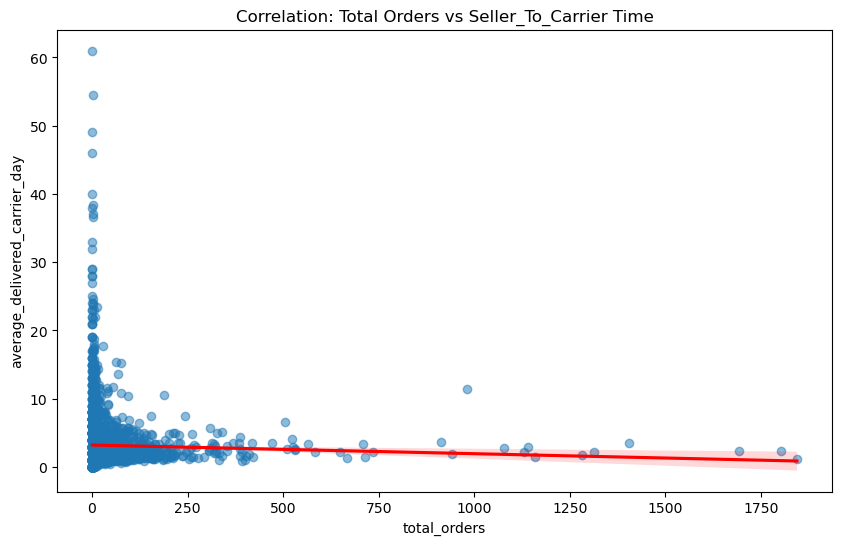

In [4]:
plt.figure(figsize=(10, 6))

sns.regplot(
    data=df, 
    x='total_orders', 
    y='average_delivered_carrier_day',
    scatter_kws={'alpha':0.5}, # Makes points semi-transparent
    line_kws={'color':'red'}    # Sets the regression line color
)

plt.title("Correlation: Total Orders vs Seller_To_Carrier Time")
plt.show()

### Finding Big Sellers

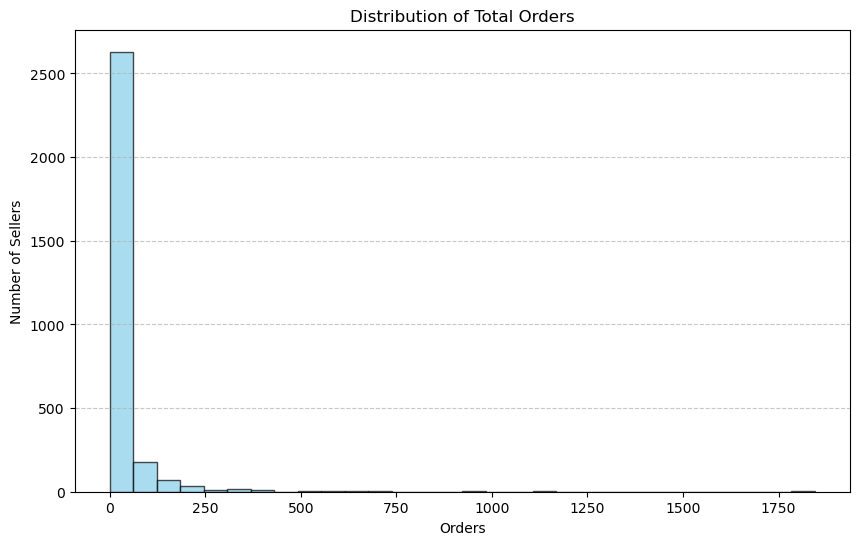

In [5]:
plt.figure(figsize=(10, 6))

plt.hist(
    df['total_orders'], 
    bins=30,             # Number of bars
    color='skyblue', 
    edgecolor='black', 
    alpha=0.7
)

plt.title('Distribution of Total Orders')
plt.xlabel('Orders')
plt.ylabel('Number of Sellers')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [6]:
big_sellers = df[df['total_orders'] > 500]

In [7]:
big_sellers = big_sellers.sort_values(by='average_delivered_carrier_day', ascending=False)
big_sellers.head()

,seller_id,total_orders,state,average_delivered_carrier_day
1479,7c67e1448b00f6e969d365cea6b010ab,980,SP,11.411224
1580,85d9eb9ddc5d00ca9336a2219c97bb13,506,MG,6.644269
2452,d2374cbcbb3ca4ab1086534108cc3ab7,522,SP,4.130268
188,1025f0e2d44d7041d6cf58b6550e0bfa,914,SP,3.730853
357,1f50f920176fa81dab994f9023523100,1404,SP,3.518519


In [8]:
big_sellers = big_sellers.sort_values(by='total_orders', ascending=False)
big_sellers.head()

,seller_id,total_orders,state,average_delivered_carrier_day
1189,6560211a19b47992c3666cc44a7e94c0,1844,SP,1.112256
856,4a3ca9315b744ce9f8e9374361493884,1803,SP,2.275652
2389,cc419e0650a3c5ba77189a1882b7556a,1692,SP,2.356383
357,1f50f920176fa81dab994f9023523100,1404,SP,3.518519
2546,da8622b14eb17ae2831f4ac5b9dab84a,1314,SP,2.200152


#### These sellers needs attendtion.
* `7c67e1448b00f6e969d365cea6b010ab` sold 980 orders. But the seller is extremely slow.
* `85d9eb9ddc5d00ca9336a2219c97bb13` sold 506 orders. And, the shipment time is slow.
* `1f50f920176fa81dab994f9023523100` sold 1404 orders. Which is the largest 4th total orders. The shipment time could be better.